In [3]:
from azureml.core import Workspace
from azureml.core import Dataset

In [4]:
import torch
torch.__version__

'1.12.0'

In [5]:
ws = Workspace.from_config()
print(ws.name, ws.resource_group, ws.location, ws.subscription_id, sep='\n')

aml-silo-dev-003
rg-silo-dev-003
westeurope
25130c3f-778b-4637-bfb8-3b1b885b45e7


In [6]:
ws.set_default_datastore('workspaceblobcompound')

In [7]:
ds = ws.get_default_datastore()
print(ds.name, ds.datastore_type, ds.account_name, ds.container_name)

workspaceblobcompound AzureBlob cytotoxstorageaccount compounds-images


In [8]:
ds_paths = [(ds, 'reference_dataset_compounds_v2/')]
dataset = Dataset.File.from_files(path = ds_paths)

In [9]:
dataset

{
  "definition": "EnginelessDataflow:\n---\ntype: mltable\npaths:\n  - pattern: \"azureml://subscriptions/25130c3f-778b-4637-bfb8-3b1b885b45e7/resourcegroups/rg-silo-dev-003/workspaces/aml-silo-dev-003/datastores/workspaceblobcompound/paths/reference_dataset_compounds_v2/\"\nmetadata:\n  infer_column_types: \"False\"\n"
}

In [10]:
mounted_path = '../data/mnt2_cytoData_v2'
mount_context = dataset.mount(mounted_path)
# dataset.download(target_path=mounted_path, overwrite=True)
mount_context.start()

import os
print(os.listdir(mounted_path))
print (mounted_path)

['DMSO_230810GA24B0', 'DMSO_230810GA24C0', 'DMSO_230817GA24A0', 'DMSO_230817GA24B0', 'DMSO_230817GA24C0', 'DMSO_230824GA24B0', 'DMSO_230831GA24A0', 'DMSO_230831GA24B0', 'DMSO_230831GA24C0', 'DMSO_230907GA24A0', 'DMSO_230907GA24B0', 'DMSO_240219GA24A0', 'DMSO_240219GA24B0', 'ORM-0001602_230817GA24C0', 'ORM-0001602_230831GA24C0', 'ORM-0001602_230907GA24A0', 'ORM-0001602_240219GA24B0', 'ORM-0002393_240219GA24A0', 'ORM-0006174_230810GA24B0', 'ORM-0006315_230810GA24B0', 'ORM-0006484_230810GA24B0', 'ORM-0006484_240219GA24A0', 'ORM-0006948_240219GA24A0', 'ORM-0010450_240219GA24A0', 'ORM-0012312_230810GA24B0', 'ORM-0012859_230810GA24B0', 'ORM-0012859_240219GA24B0', 'ORM-0013025_230810GA24B0', 'ORM-0013050_230810GA24B0', 'ORM-0013136_240219GA24B0', 'ORM-0013271_230817GA24C0', 'ORM-0013271_230831GA24C0', 'ORM-0013271_230907GA24A0', 'ORM-0013271_240219GA24A0', 'ORM-0013348_230810GA24B0', 'ORM-0013350_230810GA24B0', 'ORM-0013729_230810GA24B0', 'ORM-0013730_230810GA24C0', 'ORM-0013739_230810GA24C0'

In [11]:
len(os.listdir(mounted_path))

140

In [12]:
from PIL import Image

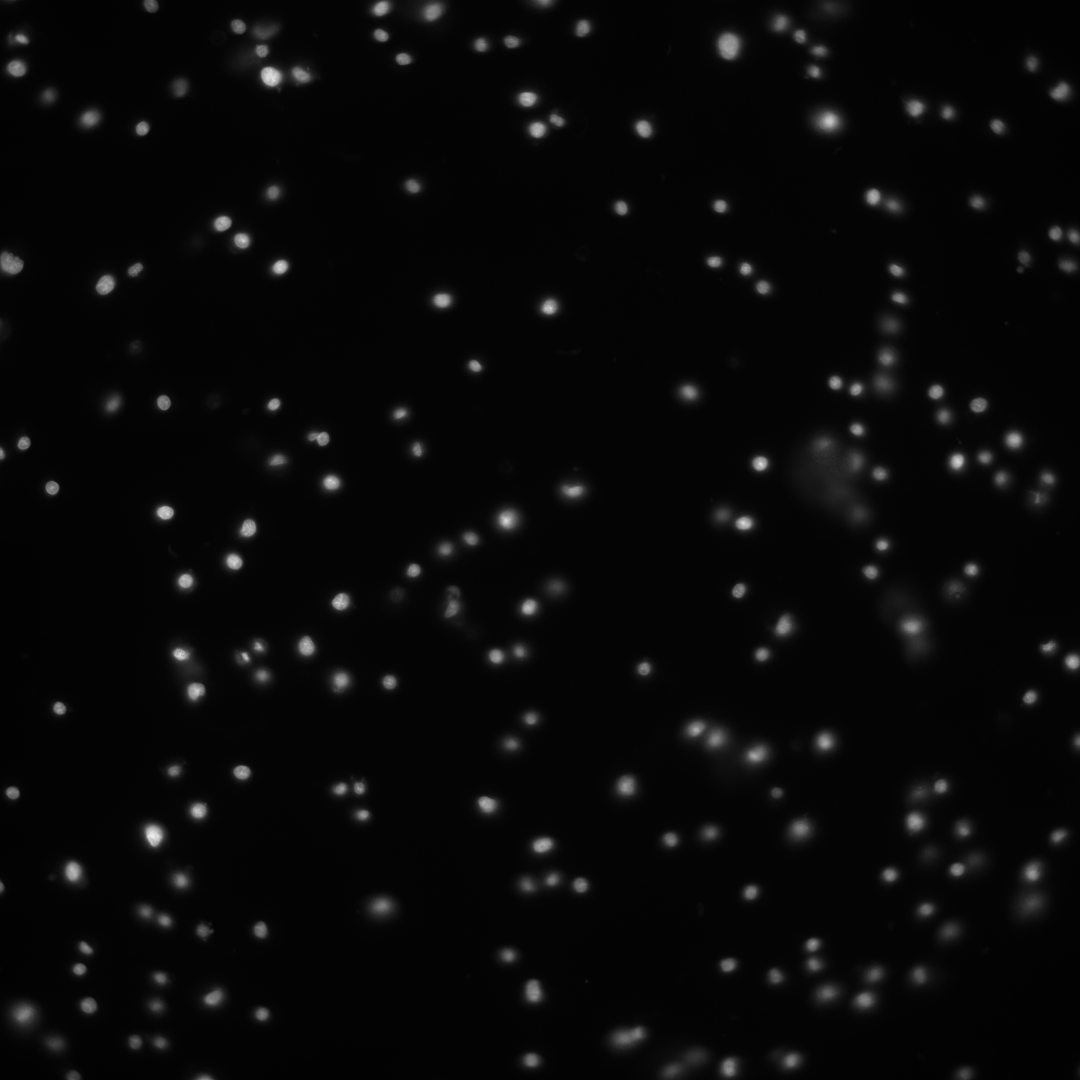

Bad pipe message: %s [b'\x0e\xa2\\\xda\x0bsZ\x02\xf4A[p/<\x1a>p\xd1\x00\x00\xa2\xc0\x14\xc0\n\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00:\x00\x89\xc0\x0f\xc0\x05\x005\x00\x84\xc0\x13\xc0\t\x003\x002\x001\x000\x00\x9a\x00\x99\x00\x98\x00\x97\x00E\x00D\x00C\x00B\xc0\x18\x004\x00\x9b\x00F\xc0\x0e\xc0\x04\x00/\x00\x96\x00A\x00\x07\xc0\x11\xc0\x07\xc0\x16\x00\x18\xc0\x0c\xc0\x02\x00\x05\x00\x04\xc0\x12\xc0\x08\x00\x16\x00\x13\x00\x10\x00\r\xc0\x17\x00\x1b\xc0\r\xc0\x03\x00\n\x00\x15\x00\x12\x00\x0f\x00\x0c\x00\x1a\x00\t\x00\x14\x00\x11\x00\x19\x00\x08\x00\x06\x00\x17\x00\x03\xc0\x10\xc0\x06\xc0\x15\xc0\x0b\xc0\x01\x00\x02\x00\x01']
Bad pipe message: %s [b"\xcdL?\x19K9?\xd7\x0f\x1d\xa8\xa7<\x89\x14mK\xe2 \xd8\x8c\x12P'\x1b-$\x8e\x92E\x81\xf3\xb9\xd8\x13\xa3_J\x80\xa0F\xb7\xb3P,)W[s6\xda\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0."]
Bad pipe message: %s [b'V\xf9\x94\x04\xe0\x06-\xec\xc7\x1f\x1bT\xc3P\x90|\x04w\x00\x00>

In [13]:
Image.open(os.path.join(mounted_path, 'ORM-0178132_230831GA24A0/001002-1-001001001.tif'))